In [1]:
#Snippets and assistance provided by Christopher Havenstein
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%%
#Set a seed for consistent results
np.random.seed(seed=1)
##Generate 10 rows of 4 random values which each sum to 1 for peoples'
# preferences
#npRatings=np.array(np.random.dirichlet(np.ones(4),size=10))
#Peoples' Preferenmces in nested dictionaries (Automate this if I have time)
people = {'Jane': {'willingness to travel': 0.1596993,
                  'desire for new experience':0.67131344,
                  'cost':0.15006726,
                  #'indian food':1,
                  #'Mexican food':1,
                  #'hipster points':3,
                  'vegetarian': 0.01892,
                  },
          'Bob': {'willingness to travel': 0.63124581,
                  'desire for new experience':0.20269888,
                  'cost':0.01354308,
                  #'indian food':1,
                  #'Mexican food':1,
                  #'hipster points':3,
                  'vegetarian': 0.15251223,
                  },
           'Charlie': {'willingness to travel': 0.312165,
                  'desire for new experience':0.472797,
                  'cost':0.0874337,
                  #'indian food':1,
                  #'Mexican food':1,
                  #'hipster points':3,
                  'vegetarian': 0.127604,
                  },
            'Daniel': {'willingness to travel': 0.24375,
                  'desire for new experience':0.521329,
                  'cost':0.0568194,
                  #'indian food':1,
                  #'Mexican food':1,
                  #'hipster points':3,
                  'vegetarian': 0.178102,
                  },
            'Emma': {'willingness to travel': 0.467763,
                  'desire for new experience':0.503437,
                  'cost':0.0198863,
                  #'indian food':1,
                  #'Mexican food':1,
                  #'hipster points':3,
                  'vegetarian': 0.00891349,
                  },
            'Felicia': {'willingness to travel': 0.0632823,
                  'desire for new experience':0.185856,
                  'cost':0.0351984,
                  #'indian food':1,
                  #'Mexican food':1,
                  #'hipster points':3,
                  'vegetarian': 0.715663,
                  },
            'Gary': {'willingness to travel': 0.577415,
                  'desire for new experience':0.138869,
                  'cost':0.214609,
                  #'indian food':1,
                  #'Mexican food':1,
                  #'hipster points':3,
                  'vegetarian': 0.0691065,
                  },
            'Helen': {'willingness to travel': 0.265751,
                  'desire for new experience':0.412282,
                  'cost':0.0042287,
                  #'indian food':1,
                  #'Mexican food':1,
                  #'hipster points':3,
                  'vegetarian': 0.317738,
                  },
            'Igor': {'willingness to travel': 0.147972,
                  'desire for new experience':0.269156,
                  'cost':0.551767,
                  #'indian food':1,
                  #'Mexican food':1,
                  #'hipster points':3,
                  'vegetarian': 0.0311052,
                  },
            'Jimmy': {'willingness to travel': 0.446693,
                  'desire for new experience':0.37458,
                  'cost':0.0681147,
                  #'indian food':1,
                  #'Mexican food':1,
                  #'hipster points':3,
                  'vegetarian': 0.110612,
                  },
                  }
#%%
###############################################################################
#Transform the user data into a matrix(M_people).
#Keep track of column and row ids.
#Normalize the points for each user -- make their preferences add to 1.
###############################################################################
peopleKeys, peopleValues = [], []
lastKey = 0
for k1, v1 in people.items():
    row = []
    for k2, v2 in v1.items():
        peopleKeys.append(k1+'_'+k2)
        if k1 == lastKey:
            row.append(v2)      
            lastKey = k1
        else:
            peopleValues.append(row)
            row.append(v2)   
            lastKey = k1
M_people = np.array(peopleValues)
#Verify the sums = 1
np.sum(M_people, axis=1)
#Not exactly 1 in all cases. Maybe a problem
#%%
###############################################################################
# Transform the restaurant data into a matrix(M_restaurants)
# use the same column index.
###############################################################################
#%%
#Generate 10 rows of random values between 1 and 10
#Snipped from Kthomas and modded 
names  = ['Flacos', 'Joes', 'McDonalds', 'BurgerKing', 'DannysTasteOfTexas ',
          'RedLobster', 'TGIFridays', 'OliveGarden', 'Derpburgers', 'PHO501']
cats = ['Distance', 'Novelty', 'Cost', 'Vegetarian']

def make_restaurants_dict(names, categories):
    restaurants = {}

    for n in names:
        npRandScores=np.random.randint(1,11,10)
        dict_input = dict(zip(categories, npRandScores))
        restaurants[n] = dict_input
    
    return restaurants

restaurants = make_restaurants_dict(names, cats)
#%%
restaurantsKeys, restaurantsValues = [], []
for k1, v1 in restaurants.items():
    for k2, v2 in v1.items():
        restaurantsKeys.append(k1+'_'+k2)
        restaurantsValues.append(v2)
#Noted that the shape needs to be the same shape as people matrix
#len(restaurantsValues)
#create np matrix and reshape to 10 by 4 in the same function
M_restaurants = np.reshape(restaurantsValues, (10,4))
#alt_M_restaurants = np.reshape(restaurantsValues, (4,10))
#Verify shape
#M_restaurants.shape
#%%
###############################################################################
# Informally describe what a linear combination is  and how it will relate to
# our resturant matrix.
###############################################################################
"""
A linear combination is when we have several constant (linear) values and 
determine the product of them and some other typically varying values. (y=mx) 
In our case we are getting the product of each rating for each restaurant 
(constants) and each persons preferences.  For example Jane’s willingness to 
travel is 0.1596993 and Flaco’s distance is 6 (Out of 10 where 10 is most 
desreable) Jane’s weighted willingness to travel to flaco's is 
6(0.1596993) = 0.958194
.
Her weighted willingness to travel to Joes's is 1(0.1596993) = 0.1596993). This
tells us that judging only from distance Flacos is best for Jane. 
"""
#%%
###############################################################################
# Choose a person and compute(using a linear combination) the top restaurant
# for them.  What does each entry in the resulting vector represent.
###############################################################################
#Swap axis on M_people
#alt_M_people = M_people
M_people = np.swapaxes(M_people, 1, 0)
#%%
#Figure out mappings
#janeTemp= M_people[:,0]
#flacoTemp=M_restaurants[0,:]
#arguments are 1st rows, 2nd columns
#For Jane only Flacos:
#janeFlacosResults=np.matmul(M_restaurants[0,:], M_people[:,0])
#For Jane all Restaurants:
janeAllResults=np.matmul(M_restaurants, M_people[:,0])
feliciaAllResults=np.matmul(M_restaurants, M_people[:,5])
"""
The result (for now) shows that the best restaurant for jane is 
janeAllResults[0]. We are using the "Dot Product".

Each result in the janeAllResults vector is the 
(weighted importance of each of Janes preferences) * (Each restaurants rating)
"""
#%%
###############################################################################
# Next compute a new matrix (M_usr_x_rest  i.e. an user by restaurant) from all
# people.  What does the a_ij matrix represent?
###############################################################################
## intuition: https://www.mathsisfun.com/algebra/matrix-multiplying.html
M_usr_x_rest=np.matmul(M_restaurants, M_people)
#alt_usr_x_rest=np.matmul(alt_M_restaurants, alt_M_people)
"""
This matrix represents each persons weighted preferences for each category 
(all persons are balanced since all must sum to 1) multiplied by the rating of
each category in each restaurant. We can rank the restaurants for each person 
and use the results to determine which will be the consensus favorite choice 
for the whole group of 10. We are using the "Dot Product" when multiplying 
these matrices.
"""

#%%

###############################################################################
# Sum all columns in M_usr_x_rest to get optimal restaurant for all users. What
# do the entry’s represent?
###############################################################################
groupFavorites=np.sum(M_usr_x_rest, axis=1)
#alt_groupFavorites=np.sum(M_usr_x_rest, axis=0)
"""groupFavorites represents the sum of each restaurants weigted score from 
each person. The result shows that the best restaurant 
considering all 10 peoples preferences versus the restaurants 1-10 rating is
groupFavorites[6] TGIFridays
We are using the "Dot Product" when multiplying these matrices.
"""
#%%

###############################################################################
# Now convert each row in the M_usr_x_rest into a ranking for each user and 
# call it M_usr_x_rest_rank. Do the same as above to generate the optimal
# resturant choice.
# Why is there a difference between the two?  What problem arrives?  What does 
# represent in the real world? How should you preprocess your data to remove
# this problem?
###############################################################################

#%%
# Understanding argsort function
# https://stackoverflow.com/questions/17901218/numpy-argsort-what-is-it-doing
#x = numpy.array([1.48,1.41,0.0,0.1])
#print x.argsort()
# >[2 3 1 0]
# The results are smallest to largest. So it is showing that the lowest value 
# is at index number 2, and the largest is at index number 0

# By default, argsort is in ascending order, but below, we make it in 
# descending order and then add 1 since ranks start at 1
#M_usr_x_rest_rank = M_usr_x_rest.argsort()[::-1] +1
M_usr_x_rest_rank = M_usr_x_rest.argsort()
#%%

###############################################################################
#What is the problem here?
###############################################################################
"""
When we convert from scores to rank we are losing the relative importance of 
things. For example: Felicia REALLY doesn't want to eat meat and it is probably
a disqualifying factor for her. If we rank the importance vegeterian appears as 
the most important #1(of4) to her as expected. However she actuually indicated 
this is 71.5 % weight of her preference therfore we are losing some precision.

I would prefer to use the calculated values rather than ranks until we
have final scores for the restaurants. 
"""
finalRestRank=groupFavorites.argsort()
#%%

#%%
###############################################################################
# Think of two metrics to compute the disatistifaction with the group.
###############################################################################

###############################################################################
# Should you split in two groups today?
###############################################################################

###############################################################################
#---- Did you understand what's going on? ---------
###############################################################################

###############################################################################
# Ok. Now you just found out the boss is paying for the meal. How should you 
#adjust. Now what is best restaurant?
###############################################################################

###############################################################################
# Tommorow you visit another team. You have the same restaurants and they told 
# you their optimal ordering for restaurants.  Can you find their weight 
# matrix?
""" We could derive a weight matrix but not THE weight matrix. When we convert 
values to rank we are losing the precision.
https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.pinv.html
"""

###############################################################################

' We could derive a weight matrix but not THE weight matrix. When we convert \nvalues to rank we are losing the precision.\nhttps://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.pinv.html\n'

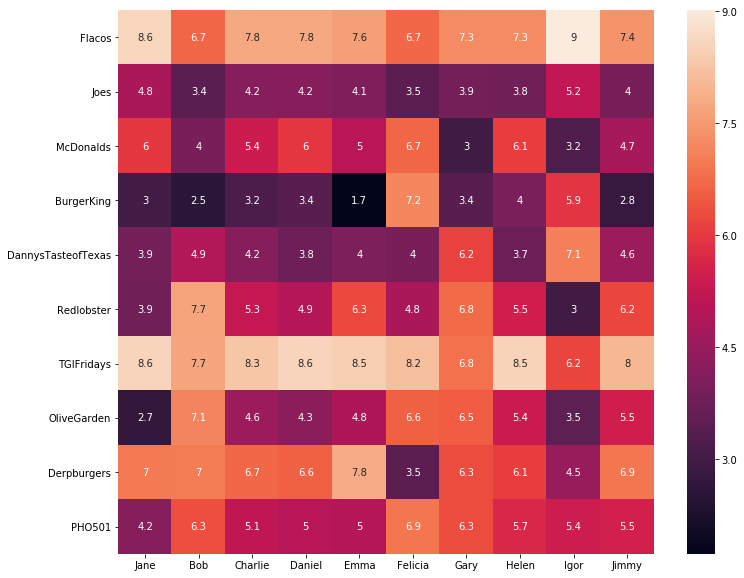

In [3]:
###############################################################################
# Find  user profiles that are problematic, explain why?
###############################################################################
import pandas as pd
derp= pd.DataFrame(data=M_usr_x_rest)


derp.columns= ['Jane','Bob','Charlie','Daniel','Emma','Felicia','Gary',
               'Helen','Igor','Jimmy',]
derp.rename(index={0:'Flacos',1:'Joes',2:'McDonalds',3:'BurgerKing',
                   4:'DannysTasteofTexas',5:'Redlobster',6:'TGIFridays',
                   7:'OliveGarden',8:'Derpburgers',9:'PHO501'}, inplace=True)

plot_dims = (12,10)
fig, ax = plt.subplots(figsize=plot_dims)
sns.heatmap(ax=ax, data=derp, annot=True)
plt.show()

"""We are looking for outliers to see if anyone has unusual preferences. The 
heatmap indicates that Gary and Igor score TGI Fridays with 6.8 and 6.2 which 
is possibly insignificant but relatively lower than everyone else. They might 
not be too happy about going to TGIFridays"""